In [4]:
import numpy as np
import pandas as pd
import helper
import matplotlib.pyplot as plt

%matplotlib inline

### Dividing up by functional groups

We update the list of building blocks by the functional group that it contains. We noticed that in position 3, there were specific chemical functional groups. We split into several different categories:
1. isocyanate
2. sulfonamide
3. carboxylic acid
4. primary amine
5. secondary amine
6. halogen


We also noticed that in position 2 of the library, there were two families of building blocks that were perfectly separated by cluster.
1. two carboxylic acids
2. one carboxylic acid and one amine

We are curious to see what the breakdown of these functional groups is in the various clusters and whether different functional groups have different distributions of P(active) values. 

In [2]:
hdb_bb3_3D_data = pd.read_csv('files/hdb_bb3_3D_data.csv')
total_merged = pd.read_csv('total_merged.csv')
#total_compounds = pd.read_csv('../data_preparation/output/total_compounds.csv')

In [6]:
assign_labels = np.zeros((len(hdb_bb3_3D_data), 6))
assign_labels[:, 0] = hdb_bb3_3D_data['SMILES'].apply(lambda x: int(helper.contains_FG(x, '[N]=C=O')))
assign_labels[:, 1] = hdb_bb3_3D_data['SMILES'].apply(lambda x: int(helper.contains_FG(x, 'O=[S](Cl)=O')))
assign_labels[:, 2] = hdb_bb3_3D_data['SMILES'].apply(lambda x: int(helper.contains_FG(x, 'O[C]=O')))
assign_labels[:, 3] = hdb_bb3_3D_data['SMILES'].apply(lambda x: int(helper.contains_FG(x, '[NH2]')))
assign_labels[:, 4] = hdb_bb3_3D_data['SMILES'].apply(lambda x: int(helper.contains_FG(x, '[NH]')))
assign_labels[:, 5] = hdb_bb3_3D_data['SMILES'].apply(lambda x: int(helper.contains_FG(x, '[Cl,Br]')))
hdb_bb3_3D_data['category'] = np.argmax(assign_labels, axis=1)


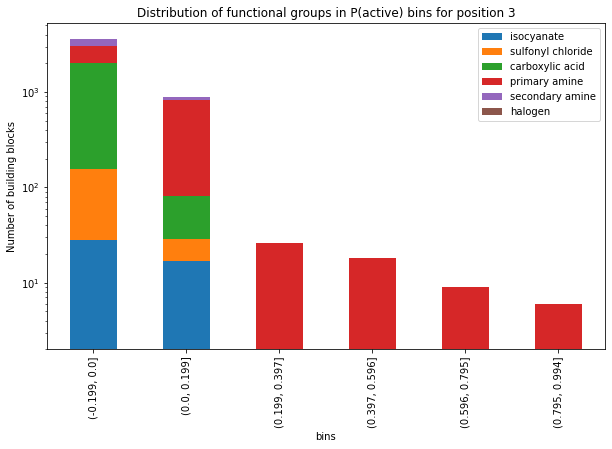

In [25]:
stacks = hdb_bb3_3D_data.groupby(['category', 'bins'], as_index=True)\
                        .size().unstack().fillna(0)
fig, axs = plt.subplots(figsize=(10,6))
stacks.T.plot(kind='bar', stacked=True, logy=True, ax=axs)
axs.set_ylabel('Number of building blocks')
axs.set_title('Distribution of functional groups in P(active) bins for position 3')
axs.legend(labels=['isocyanate', 'sulfonyl chloride', 'carboxylic acid',
                   'primary amine', 'secondary amine', 'halogen'])
plt.show()

In [29]:
hdb_bb2_3D_data = pd.read_csv('files/hdb_bb2_3D_data.csv')
hdb_bb2_3D_data

,SMILES,P(active),stereo_SMILES,Cluster,cluster_prob,bins
0,C(C#N)[C@H](C(=O)O)N,0.000000,C(C#N)[C@H](C(=O)O)N,2,0.848266,"(-0.103, 0.0]"
1,C(C(=O)O)N,0.000000,C(C(=O)O)N,2,0.732026,"(-0.103, 0.0]"
2,C(C(C(=O)O)N)C(=O)N,0.000000,C([C@H](C(=O)O)N)C(=O)N,2,0.702394,"(-0.103, 0.0]"
3,C(CC(=O)O)C(=O)O,0.000154,C(CC(=O)O)C(=O)O,3,0.612033,"(0.0, 0.103]"
4,C(CC(=O)O)[C@@H](C(=O)N)N,0.000089,C(CC(=O)O)[C@@H](C(=O)N)N,0,0.000000,"(0.0, 0.103]"
...,...,...,...,...,...,...
344,c1nc(c(o1)C2CNCCO2)C(=O)O,0.000268,c1nc(c(o1)[C@@H]2CNCCO2)C(=O)O,0,0.000000,"(0.0, 0.103]"
345,c1nc(c(o1)CCC(=O)O)C(=O)O,0.002019,c1nc(c(o1)CCC(=O)O)C(=O)O,3,0.585811,"(0.0, 0.103]"
346,c1nc(c(o1)COCC(=O)O)C(=O)O,0.001534,c1nc(c(o1)COCC(=O)O)C(=O)O,0,0.000000,"(0.0, 0.103]"
347,c1nc(nn1CC2CCNCC2)C(=O)O,0.001794,c1nc(nn1CC2CCNCC2)C(=O)O,0,0.000000,"(0.0, 0.103]"


### To do

We have code in `paper_scripts/2D_bin_similarity.ipynb` that looks at all pairings of BB1 and BB2 that form compounds with the different category BB3. But it might be better to try and do some sort of SMIRKS matching because we know the BBs in position 2 are split into one of two categories.

In [37]:
# Rougher versions of the BB splitting can be found in these files.
b1 = pd.read_csv('../../paper_scripts/bb1_info.csv')
b2 = pd.read_csv('../../paper_scripts/bb2_info.csv')
b3 = pd.read_csv('../../paper_scripts/bb3_info.csv')

,SMILES,P(active),bb3_cat,bb3_bin
0,O=C(O)C1=CC=C(C(F)F)C=C1,0.000000,2,0
1,NC(=O)C1=CN=C(Cl)C=C1,0.000000,3,0
2,CNC(=O)C1=CN=C(Cl)C=C1,0.000000,4,0
3,CC1=NC2=C(C=C(C(=O)O)C=C2)S1,0.018755,2,0
4,O=C(O)CC1CCCC1,0.000000,2,0
...,...,...,...,...
4567,NC1=C(OC2=CC=C(F)C=C2)C=CC=C1,0.000000,3,0
4568,CCN1CCCC(CNC)C1,0.000000,4,0
4569,CCN(CC)C(CN)C1=CC=CO1,0.000000,3,0
4570,CCC1=C(C)N(CCN)N=C1C,0.000000,3,0
